Mohini Yadav and Erin Nell


**Important Links:**

[Link to GitHub Repository](https://github.com/momotheduckyy/momotheduckyy.github.io)

[Link to the dataset and additional information](https://www.kaggle.com/datasets/abdulszz/spotify-most-streamed-songs?resource=download)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks"

'Colab Notebooks'      'Copy of Lab04 (1).ipynb'  'Copy of Lab07.ipynb'   spotifymoststreamed.csv
'Copy of Lab01.ipynb'  'Copy of Lab04.ipynb'	   Lab03.ipynb		  test_file.txt
'Copy of Lab02.ipynb'  'Copy of Lab05.ipynb'	   Project.html		  Untitled
'Copy of Lab03.ipynb'  'Copy of Lab06.ipynb'	   Project.ipynb


In [ ]:
!mv "/content/drive/MyDrive/Colab Notebooks/Project" "/content/drive/MyDrive/Colab Notebooks/Project.ipynb"

mv: cannot stat '/content/drive/MyDrive/Colab Notebooks/Project': No such file or directory


In [ ]:
%%shell
jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Project.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Project.ipynb to html
[NbConvertApp] Writing 595788 bytes to /content/drive/MyDrive/Colab Notebooks/Project.html


# Project Overview

For this project, the group is Mohini Yadav and Erin Nell. We are focusing on a dataset containing streaming data for songs on Spotify and other streaming platforms like Apple Music Deezer, and Shazam. This dataset, Spotify Songs Streamed, includes various features such as song titles, artists, and release years, and streaming counts across different platforms. We believe that working with Spotify streaming data presents a unique opportunity to further understand market insights and song performance. Analyzing streaming data helps us understand current music trends, and evolving listener preferences. This insight can be valuable for artists, producers, and marketers in the music industry. With song performance, understanding which songs perform best on streaming platforms can inform marketing strategies and decisions on which songs to promote. Some possible questions for further exploration are: Who are the top three most popular artists ever based on streaming counts? Is there a link between artists on a track and number of streams? This question aims to identify the leading artists in terms of total streams across their catalog and identify trends. We also want to observe whether there is a particular year when the most popular songs were released and filter that data by stream count. During the extraction, transformation, and loading (ETL) process, we aim to gather insights and statistics that highlight the dataset's characteristics.

#Collaboration Plan
The team plans to meet once a week to work on and discuss the project and determine next steps. We will also communicate frequently over text messages to stay updated with our progress on the project and, if necessary, we will meet over facetime or schedule additional in-person meetings. We also have a Google Doc which has a list of to-do items and general notes about the project. Lastly, we have a shared Github repository where we may store and update our code.

# ETL (Extraction, Transform, and Load)
We loaded a dataset from Kaggle about music streaming information. We tidied the data by removing the cover_url link which we would not be using in our analysis, ensuring the data is the correct type, and removing columns with incomplete data or replacing with NaN depending on the context.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/My Drive/spotify/spotifymoststreamed.csv'
df = pd.read_csv(path)
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


First, we are removing columns not valuable to our analysis. We are removing any column which refers to the number of playlists since we do not have the scale. i.e. how many playlists on the platform, so we can not compare this number across platforms.

In [ ]:
# drop cover_url since it is not useful to our analysis
df = df.drop(['cover_url', 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists'], axis=1)

Ensure that the data has correct types. We want to make sure that each data type correctly reflects the type of value in that variable.

In [ ]:
# Identify rows with non-numeric 'streams' values
non_numeric_streams = df[~df['streams'].str.isnumeric()]

# Remove row
df = df.drop(574)

# fixing data types by converting from int64 to object since we want to view dates as categorical variables
df['released_year'] = df['released_year'].astype('object')
df['released_month'] = df['released_month'].astype('object')
df['released_day'] = df['released_day'].astype('object')

# convert "streams" to an integer (currently prints as object)
df['streams'] = df['streams'].astype('int64')

display(df.dtypes)

,0
track_name,object
artist(s)_name,object
artist_count,int64
released_year,object
released_month,object
released_day,object
in_spotify_charts,int64
streams,int64
in_apple_charts,int64
in_deezer_charts,int64


Looking at this initial code, there are lots of values with missing data specifically in the key and in_shazam_charts columns, so we are replacing those values with NaN. We will not be removing the columns entirely because the row still provides important data about streaming count which could be analyzed seperately.


In [ ]:
df = df.replace({'': np.nan, None: np.nan})
df.head()

<ipython-input-8-809a6e980278>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'': np.nan, None: np.nan})


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_charts,streams,in_apple_charts,in_deezer_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,147,141381703,263,10,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,48,133716286,126,14,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,113,140003974,207,14,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,100,800840817,207,12,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,50,303236322,133,15,...,144,A,Minor,65,23,80,14,63,11,6


# Exploratory Data Analysis (EDA)

**Maximum**

One interesting statistic that we may want to look at is finding the maximum. In this case, we sought to find the track with the maximum number of streams which ended up being Blinding Lights by The Weeknd. Knowing which song has performed the best can provide valuable insights, such as analyzing the aspects of this song and what contributed to its popularity.

In [ ]:
df.loc[df['streams'].idxmax()]


,55
track_name,Blinding Lights
artist(s)_name,The Weeknd
artist_count,1
released_year,2019
released_month,11
released_day,29
in_spotify_charts,69
streams,3703895074
in_apple_charts,199
in_deezer_charts,20


**Summary Statistics**

Next, we wanted to look into some of the additional attributes included in this dataset, such as the percentage of the song that is acoustic. From the summary statistics below we can infer that songs with less acousticness are more likely to appear on this list of most streamed songs. This is evident from the average being about 27% acousticness and 75% of the data falling beneath an acoustic level of 43%. Moreover, from when we found the most streamed song, Blinding Lights by The Weeknd, it confirms our analysis that songs with less acousticness do better as that song has 0% acoustic and performed the best.

In [ ]:
# summary statistics for the percent of a song being acoustic
df['acousticness_%'].describe()

,acousticness_%
count,952.000000
mean,27.078782
std,26.001599
min,0.000000
25%,6.000000
50%,18.000000
75%,43.000000
max,97.000000


**Box Plot and Count**

Below is a boxplot showing the average number of streams to the number of artists in a song. Note, that in this data bands are considered to be one artist. For example, the k-pop group BTS is listed as 1 for artist count. Thus, artist_count in this context are collaborations between different artists. From the bar graph, we can see that songs with an artist count of 1 are most popular, but this does not necessarily mean that songs with collaborations can not perform well. This is useful to our exploration and goal because it can help us deduce what makes a song popular and become one of the most streamed songs.

<Axes: xlabel='artist_count'>

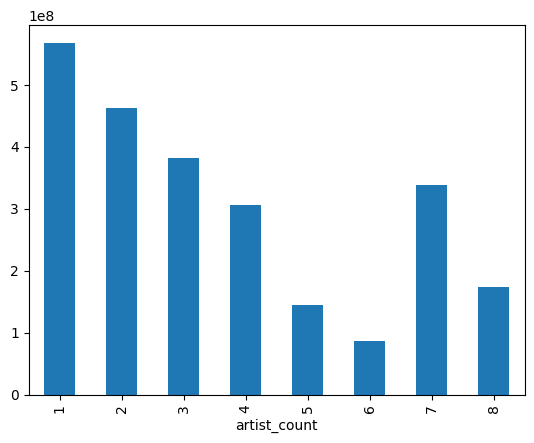

In [ ]:
# create a boxplot which compares the average number of streams to number of artists in a song
average_streams = df.groupby('artist_count')['streams'].mean().reset_index()
average_streams.plot.bar(x="artist_count", y="streams", legend=False)

However, looking at the song count by artist count, we can see that songs with more artists are less likely to make it onto this list of top streamed songs on spotify, with only two songs making the list.

In [ ]:
# create a new dataframe
  # grouping by artist_count and making index soung_count to find the number of songs under the different counts of artists featured on the track
count_by_artist_count = df.groupby('artist_count').size().reset_index(name='song_count')

# Print the count of songs by artist count
print("Count of songs by artist count:")
print(count_by_artist_count)

Count of songs by artist count:
   artist_count  song_count
0             1         586
1             2         254
2             3          85
3             4          15
4             5           5
5             6           3
6             7           2
7             8           2


**Histogram**

Next, to get a better sense of the data we made a histogram which shows the frequency that a certain month appears in the datatset of most streamed songs. This is relavent to our goal because it can help us identify trends to see if songs released in certain months are more likely to perform well. The histogram below could be considered multimodal, with multiple bumps histogram indicating a frequency of data around January, May, and December. Thus, if we were to make a conclusion from this graph, it could be said that songs released in these months are more likely to perform better in terms of meeting the list of Spotify Most Streamed Songs.

Text(0.5, 0, 'Month Released')

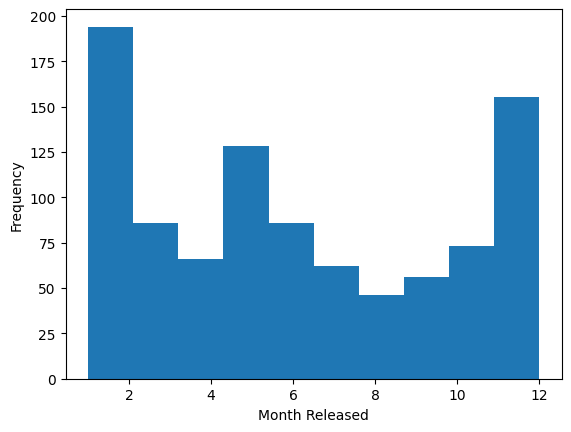

In [ ]:
# plot a histogram for released_month
df['released_month'].plot.hist(bins = 10)

# plot label for x-axis
plt.xlabel('Month Released')